# Accumulation

## HMR files to use:

In [1]:
HMR_DIR=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/

H1_FILE=${HMR_DIR}H1ESC.minsize50.filtforrefseqTSSexons.txt
HSPC_FILE=${HMR_DIR}HSC.minsize50.filtforrefseqTSSexons.txt
MACRO_FILE=${HMR_DIR}Macrophage.minsize50.filtforrefseqTSSexons.txt
BCELL_FILE=${HMR_DIR}Bcell.minsize50.filtforrefseqTSSexons.txt

## R:

## Load libaries and files 

In [1]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
setwd("/data/hodges_lab/Tim/ACCUMULATION_PERSISTENCE/")

# Load in to check numbers
H1_FILE <- read_tsv("/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/H1ESC.minsize50.filtforrefseqTSSexons.txt", col_names = FALSE)
HSPC_FILE <- read_tsv("/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/HSC.minsize50.filtforrefseqTSSexons.txt", col_names = FALSE)
MACRO_FILE <- read_tsv("/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/Macrophage.minsize50.filtforrefseqTSSexons.txt", col_names = FALSE)
BCELL_FILE <- read_tsv("/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/Bcell.minsize50.filtforrefseqTSSexons.txt", col_names = FALSE)

Rows: 18235 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1
dbl (3): X2, X3, X4

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 46056 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1
dbl (3): X2, X3, X4

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 54331 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1
dbl (3): X2, X3, X4

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 34070 Columns: 4
── Column specification ────────────────────────────────

In [4]:
H1_FILE

X1,X2,X3,X4
<chr>,<dbl>,<dbl>,<dbl>
chr1,564470,566570,2100
chr1,566713,566879,166
chr1,567112,567402,290
chr1,567500,567696,196
chr1,567881,568325,444
chr1,568459,568587,128
chr1,568760,570301,1541
chr1,713671,714779,1108
chr1,724205,724285,80


## Create dataframe for plotting accumulation

In [14]:
df_acc <- tibble(
    Celltype = c("H1 ESC", "HSPC", "Macrophage", "B cell"),
    Stage = c("H1ESC","HSPC","Differentiated","Differentiated"),
    Count = c(18235, 46056, 54331, 34070)
)

df_acc$Celltype <- factor(df_acc$Celltype, levels = c("H1 ESC", "HSPC", "Macrophage", "B cell"))
df_acc$Stage <- factor(df_acc$Stage, levels = c("H1ESC","HSPC","Differentiated"))

df_acc

Celltype,Stage,Count
<fct>,<fct>,<dbl>
H1 ESC,H1ESC,18235
HSPC,HSPC,46056
Macrophage,Differentiated,54331
B cell,Differentiated,34070


## Plot

png 
  2

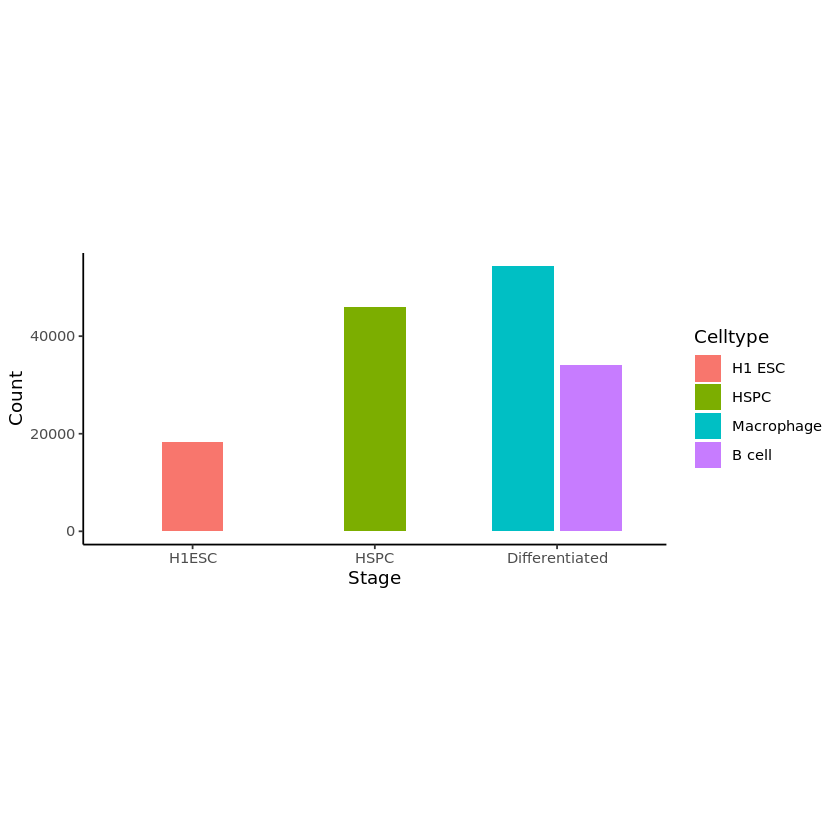

In [26]:
pdf("Accumulation.byStage.plot.pdf")

p_a1 <- ggplot(df_acc, aes(x = Stage, y = Count)) +
    geom_bar(aes(fill = Celltype), stat = "identity", position = position_dodge2(width = 0.9, preserve = "single"), width = .75) +
    theme_classic() +
    theme(aspect.ratio = .5)
p_a1

dev.off()

p_a1

png 
  2

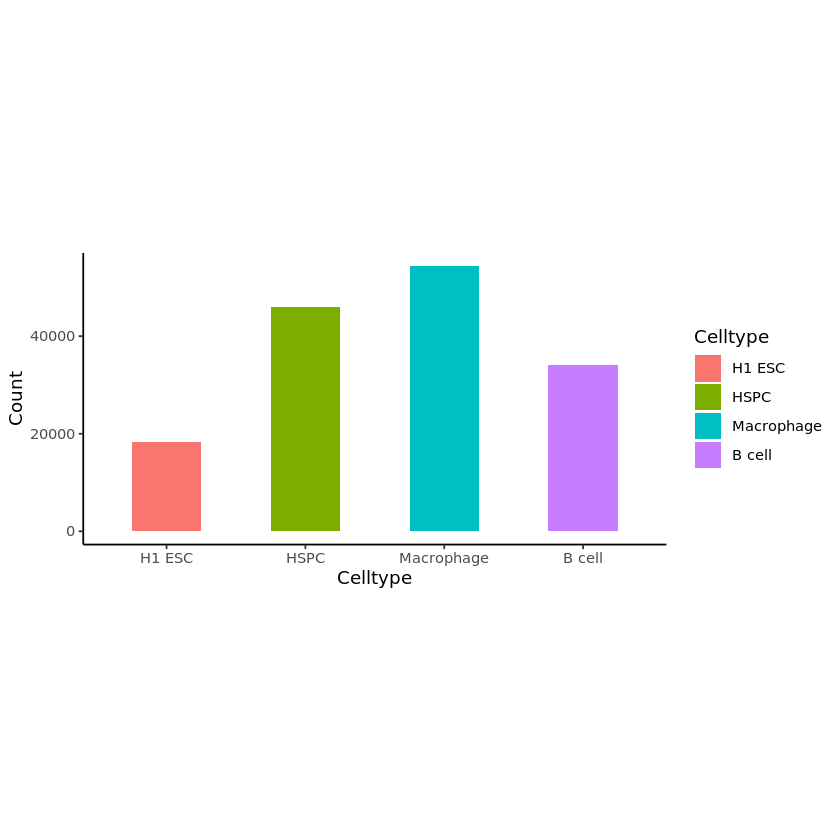

In [21]:
pdf("Accumulation.plot.pdf")

p_a <- ggplot(df_acc, aes(x = Celltype, y = Count)) +
    geom_bar(aes(fill = Celltype), stat = "identity", position = "dodge", width = .5) +
    theme_classic() +
    theme(aspect.ratio = .5)
p_a

dev.off()

p_a

# Persistence

## Get numbers: H1 ESC

In [4]:
HMR_DIR=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/

In [6]:
## H1ESC starting
wc -l ${HMR_DIR}H1ESC.minsize50.filtforrefseqTSSexons.txt

18235 /data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/H1ESC.minsize50.filtforrefseqTSSexons.txt


In [1]:
## H1ESC persist HSPC
bedtools intersect -u -a ${HMR_DIR}H1ESC.minsize50.filtforrefseqTSSexons.txt -b ${HMR_DIR}HSC.minsize50.filtforrefseqTSSexons.txt | wc -l 

11959


In [11]:
## H1ESC persist HSPC - persist Macrophage
bedtools intersect -u -a ${HMR_DIR}H1ESC.minsize50.filtforrefseqTSSexons.txt -b ${HMR_DIR}HSC.minsize50.filtforrefseqTSSexons.txt | bedtools intersect -u -a - -b ${HMR_DIR}Macrophage.minsize50.filtforrefseqTSSexons.txt | wc -l 

11310


In [ ]:
## H1ESC persist HSPC - persist B cell 

In [12]:
## H1ESC persist HSPC - persist Macrophage
bedtools intersect -u -a ${HMR_DIR}H1ESC.minsize50.filtforrefseqTSSexons.txt -b ${HMR_DIR}HSC.minsize50.filtforrefseqTSSexons.txt | bedtools intersect -u -a - -b ${HMR_DIR}Bcell.minsize50.filtforrefseqTSSexons.txt | wc -l 

10285


## Get numbers: HSPC

In [5]:
HMR_DIR=/data/hodges_lab/Tim/finalAnalyses_HMRs/hp_lineage/filtRefSeqFiles/

In [7]:
## HSPC NOT in H1 ESC
bedtools intersect -v -a ${HMR_DIR}HSC.minsize50.filtforrefseqTSSexons.txt -b ${HMR_DIR}H1ESC.minsize50.filtforrefseqTSSexons.txt | wc -l 

34605


In [9]:
## HSPC NOT in H1 ESC - Persist B cell 
bedtools intersect -v -a ${HMR_DIR}HSC.minsize50.filtforrefseqTSSexons.txt -b ${HMR_DIR}H1ESC.minsize50.filtforrefseqTSSexons.txt | bedtools intersect -u -a - -b ${HMR_DIR}Macrophage.minsize50.filtforrefseqTSSexons.txt | wc -l  

27312


In [10]:
## HSPC NOT in H1 ESC - Persist B cell 
bedtools intersect -v -a ${HMR_DIR}HSC.minsize50.filtforrefseqTSSexons.txt -b ${HMR_DIR}H1ESC.minsize50.filtforrefseqTSSexons.txt | bedtools intersect -u -a - -b ${HMR_DIR}Bcell.minsize50.filtforrefseqTSSexons.txt | wc -l  

15185


## R: Create dataframes

In [2]:
library(tidyverse)
library(ggplot2)

setwd("/data/hodges_lab/Tim/ACCUMULATION_PERSISTENCE/")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [8]:
H1_persist <- tibble(
    Celltype = c("H1 ESC", "HSPC", "Macrophage", "B cell"),
    Stage = c("H1ESC","HSPC","Differentiated","Differentiated"),
    Count = c(18235, 11959, 11310, 10285)
)

H1_persist$Celltype <- factor(H1_persist$Celltype, levels = c("H1 ESC", "HSPC", "Macrophage", "B cell"))
H1_persist$Stage <- factor(H1_persist$Stage, levels = c("H1ESC","HSPC","Differentiated"))

In [16]:
HSPC_persist <- tibble(
    Celltype = c("H1 ESC", "HSPC", "Macrophage", "B cell"),
    Stage = c("H1 ESC", "HSPC","Differentiated","Differentiated"),
    Count = c(0, 34605, 27312, 15185)
)

HSPC_persist$Celltype <- factor(HSPC_persist$Celltype, levels = c("H1 ESC","HSPC", "Macrophage", "B cell"))
HSPC_persist$Stage <- factor(HSPC_persist$Stage, levels = c("H1 ESC","HSPC","Differentiated"))

## Plot

png 
  2

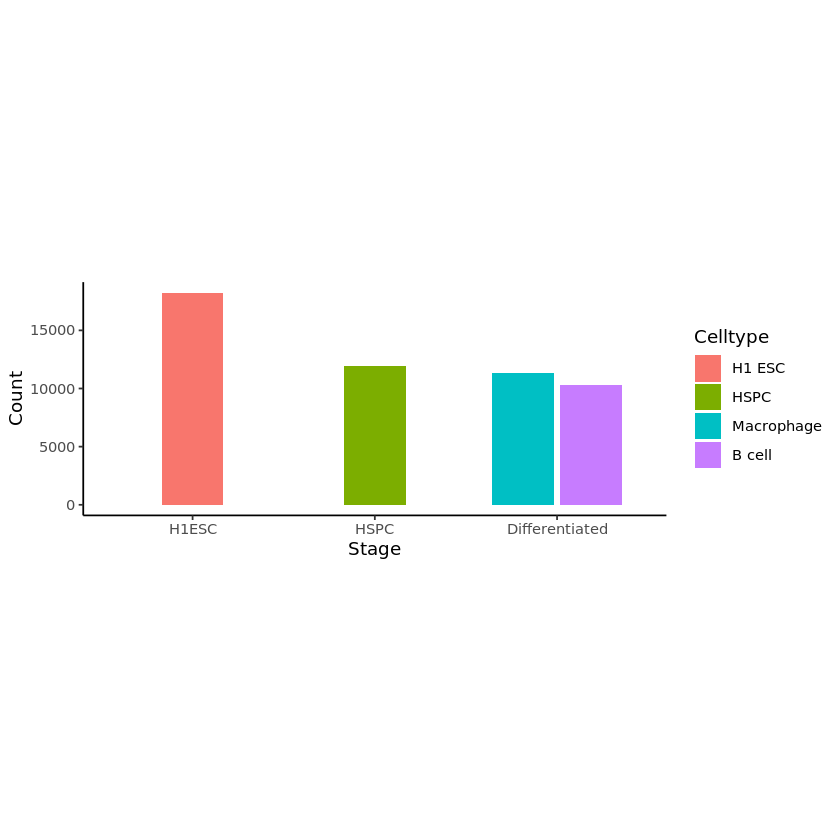

In [22]:
pdf("Persistence.H1ESC.pdf")

p_H1persist <- H1_persist %>%
ggplot(aes(x = Stage, y = Count)) +
    geom_bar(aes(fill = Celltype), stat = "identity", position = position_dodge2(width = 0.9, preserve = "single"), width = .75) +
    theme_classic() +
    theme(aspect.ratio = .4) 
p_H1persist

dev.off()
p_H1persist


png 
  2

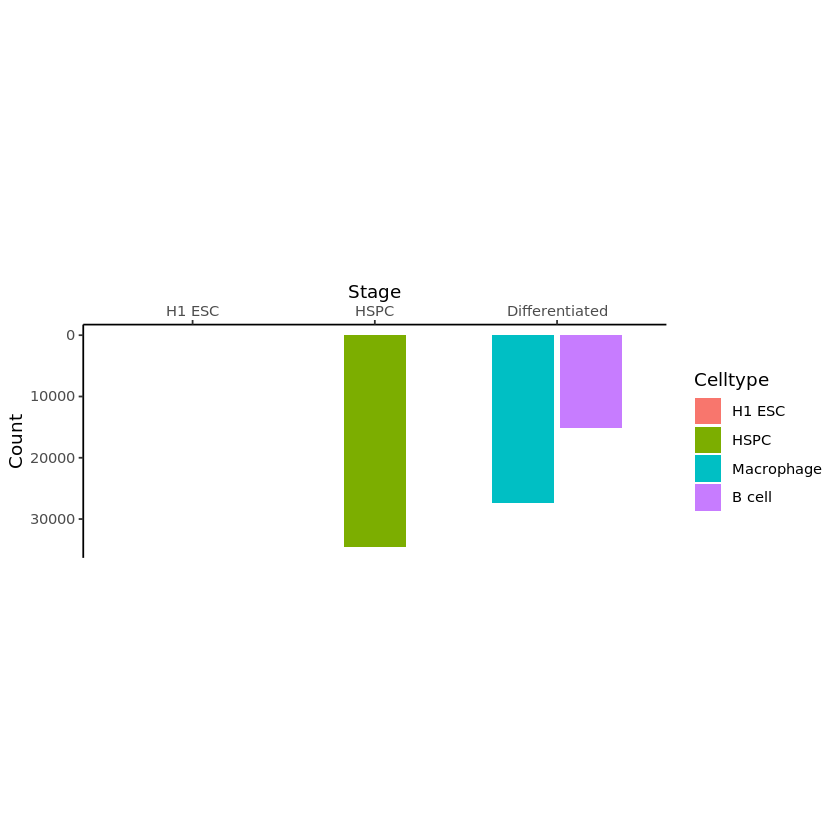

In [23]:
pdf("Persistence.HSPC.pdf")

p_HSPCpersist <- HSPC_persist %>%
ggplot(aes(x = Stage, y = Count)) +
    geom_bar(aes(fill = Celltype), stat = "identity", position = position_dodge2(width = 0.9, preserve = "single"), width = .75) +
    theme_classic() +
    theme(aspect.ratio = .4) +
    scale_y_reverse() +
    scale_x_discrete(position = "top")
p_HSPCpersist

dev.off()
p_HSPCpersist